In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv('stock_prices.csv')

In [6]:
df.head()


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False


In [7]:
# Size of the dataset
dataset_size = df.shape
print("Dataset Size:", dataset_size)

Dataset Size: (4000, 11)


In [12]:
df.columns

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'],
      dtype='object')

In [13]:
df.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend
count,4000.00000,3990.000000,3990.000000,3990.000000,3990.000000,4.000000e+03,4000.000000,0.0
mean,5883.05400,2769.756817,2811.185163,2734.021303,2783.387870,5.925823e+05,0.999875,NaN
std,2390.10627,4374.114452,4436.667423,4311.046277,4395.682456,2.103113e+06,0.007906,NaN
min,1301.00000,35.000000,36.000000,35.000000,35.000000,0.000000e+00,0.500000,NaN
25%,3915.75000,1039.250000,1057.000000,1027.000000,1044.250000,3.577500e+04,1.000000,NaN
50%,6200.50000,1852.000000,1891.500000,1839.000000,1879.500000,1.002000e+05,1.000000,NaN
75%,7938.25000,3113.750000,3159.250000,3085.000000,3130.000000,3.525750e+05,1.000000,NaN
max,9997.00000,74770.000000,76390.000000,74450.000000,76120.000000,5.421950e+07,1.000000,NaN


In [14]:
# Display the first few rows and basic info about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RowId             4000 non-null   object 
 1   Date              4000 non-null   object 
 2   SecuritiesCode    4000 non-null   int64  
 3   Open              3990 non-null   float64
 4   High              3990 non-null   float64
 5   Low               3990 non-null   float64
 6   Close             3990 non-null   float64
 7   Volume            4000 non-null   int64  
 8   AdjustmentFactor  4000 non-null   float64
 9   ExpectedDividend  0 non-null      float64
 10  SupervisionFlag   4000 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 316.5+ KB


(None,
            RowId        Date  SecuritiesCode    Open    High     Low   Close  \
 0  20211206_1301  2021-12-06            1301  2982.0  2982.0  2965.0  2971.0   
 1  20211206_1332  2021-12-06            1332   592.0   599.0   588.0   589.0   
 2  20211206_1333  2021-12-06            1333  2368.0  2388.0  2360.0  2377.0   
 3  20211206_1375  2021-12-06            1375  1230.0  1239.0  1224.0  1224.0   
 4  20211206_1376  2021-12-06            1376  1339.0  1372.0  1339.0  1351.0   
 
     Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag  
 0     8900               1.0               NaN            False  
 1  1360800               1.0               NaN            False  
 2   125900               1.0               NaN            False  
 3    81100               1.0               NaN            False  
 4     6200               1.0               NaN            False  )

In [1]:
#RowId: Object (string), 4000 non-null values. Consider converting it to a more suitable data type, such as 'int64', since it seems to be an identifier.

#Date: Object (string), 4000 non-null values. Consider converting it to a 'datetime' object for better date handling.

#SecuritiesCode: Integer with 4000 non-null values, indicating a unique identifier.

#Open, High, Low, Close: Float, with 3990 non-null values each. There are 10 missing values in each of these columns. Handling missing values is necessary.

#Volume: Integer with 4000 non-null values, indicating a numerical attribute.

#AdjustmentFactor: Float with 4000 non-null values.

#ExpectedDividend: All 0 non-null values. Consider dropping this column as it provides no information.

#SupervisionFlag: Boolean column with 4000 non-null values

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('stock_prices.csv')

# Convert 'RowId' to int64
df['RowId'] = df['RowId'].astype('int64')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Handle Missing Values in 'Open', 'High', 'Low', 'Close'
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].fillna(value=0)

# Drop 'ExpectedDividend' Column
df = df.drop(columns=['ExpectedDividend'])

# Display the first few rows and basic info about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   RowId             4000 non-null   int64         
 1   Date              4000 non-null   datetime64[ns]
 2   SecuritiesCode    4000 non-null   int64         
 3   Open              4000 non-null   float64       
 4   High              4000 non-null   float64       
 5   Low               4000 non-null   float64       
 6   Close             4000 non-null   float64       
 7   Volume            4000 non-null   int64         
 8   AdjustmentFactor  4000 non-null   float64       
 9   SupervisionFlag   4000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3)
memory usage: 285.3 KB


(None,
           RowId       Date  SecuritiesCode    Open    High     Low   Close  \
 0  202112061301 2021-12-06            1301  2982.0  2982.0  2965.0  2971.0   
 1  202112061332 2021-12-06            1332   592.0   599.0   588.0   589.0   
 2  202112061333 2021-12-06            1333  2368.0  2388.0  2360.0  2377.0   
 3  202112061375 2021-12-06            1375  1230.0  1239.0  1224.0  1224.0   
 4  202112061376 2021-12-06            1376  1339.0  1372.0  1339.0  1351.0   
 
     Volume  AdjustmentFactor  SupervisionFlag  
 0     8900               1.0            False  
 1  1360800               1.0            False  
 2   125900               1.0            False  
 3    81100               1.0            False  
 4     6200               1.0            False  )

In [ ]:
#RowId: Converted to 'int64', and now it has the correct data type.
#Date:Converted to 'datetime64[ns]', providing a better representation of date values.
#Handling Missing Values: The 'Open', 'High', 'Low', and 'Close' columns have been filled with zeros. 
#Dropped 'ExpectedDividend' Column:
#The 'ExpectedDividend' column has been successfully dropped from the DataFrame.

In [4]:
# Check the data types of all columns in the DataFrame
data_types = df.dtypes
print(data_types)


RowId                        int64
Date                datetime64[ns]
SecuritiesCode               int64
Open                       float64
High                       float64
Low                        float64
Close                      float64
Volume                       int64
AdjustmentFactor           float64
SupervisionFlag               bool
dtype: object


In [5]:
# Print data types along with additional information
print("Data Types and Additional Information:")
for column in df.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {df[column].nunique()}")
    print(f" - Sample Values: {df[column].dropna().unique()[:5]}")  # Display first 5 unique non-null values
    print()

Data Types and Additional Information:
Column: RowId
 - Data Type: int64
 - Number of Unique Values: 4000
 - Sample Values: [202112061301 202112061332 202112061333 202112061375 202112061376]

Column: Date
 - Data Type: datetime64[ns]
 - Number of Unique Values: 2
 - Sample Values: ['2021-12-06T00:00:00.000000000' '2021-12-07T00:00:00.000000000']

Column: SecuritiesCode
 - Data Type: int64
 - Number of Unique Values: 2000
 - Sample Values: [1301 1332 1333 1375 1376]

Column: Open
 - Data Type: float64
 - Number of Unique Values: 2419
 - Sample Values: [2982.  592. 2368. 1230. 1339.]

Column: High
 - Data Type: float64
 - Number of Unique Values: 2442
 - Sample Values: [2982.  599. 2388. 1239. 1372.]

Column: Low
 - Data Type: float64
 - Number of Unique Values: 2459
 - Sample Values: [2965.  588. 2360. 1224. 1339.]

Column: Close
 - Data Type: float64
 - Number of Unique Values: 2460
 - Sample Values: [2971.  589. 2377. 1224. 1351.]

Column: Volume
 - Data Type: int64
 - Number of Uniqu

In [6]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()
print(missing_values)


RowId               0
Date                0
SecuritiesCode      0
Open                0
High                0
Low                 0
Close               0
Volume              0
AdjustmentFactor    0
SupervisionFlag     0
dtype: int64


In [9]:

# Check for duplicate records
duplicates = df.duplicated().sum()
print("Number of Duplicate Records:", duplicates)

Number of Duplicate Records: 0


In [11]:
# Function to clean format inconsistencies
def clean_format_inconsistencies(column, data_type):
    if data_type == 'categorical':
        # Convert to lower case and strip whitespace
        df[column] = df[column].str.lower().str.strip()
    elif data_type == 'datetime':
        # Convert to a standard datetime format
        df[column] = pd.to_datetime(df[column], errors='coerce', format='%Y-%m-%d')  # Specify the format as per your data

# Apply the cleaning function for each column
for column in df.columns:
    data_type = 'categorical' if pd.api.types.is_categorical_dtype(df[column]) else 'datetime' if pd.api.types.is_datetime64_any_dtype(df[column]) else 'other'
    if data_type in ['categorical', 'datetime']:
        clean_format_inconsistencies(column, data_type)

# Display the first few rows of the cleaned dataframe
print(df.head())
     

          RowId       Date  SecuritiesCode    Open    High     Low   Close  \
0  202112061301 2021-12-06            1301  2982.0  2982.0  2965.0  2971.0   
1  202112061332 2021-12-06            1332   592.0   599.0   588.0   589.0   
2  202112061333 2021-12-06            1333  2368.0  2388.0  2360.0  2377.0   
3  202112061375 2021-12-06            1375  1230.0  1239.0  1224.0  1224.0   
4  202112061376 2021-12-06            1376  1339.0  1372.0  1339.0  1351.0   

    Volume  AdjustmentFactor  SupervisionFlag  
0     8900               1.0            False  
1  1360800               1.0            False  
2   125900               1.0            False  
3    81100               1.0            False  
4     6200               1.0            False  


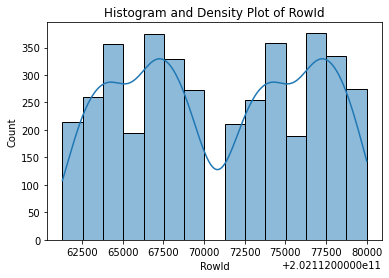

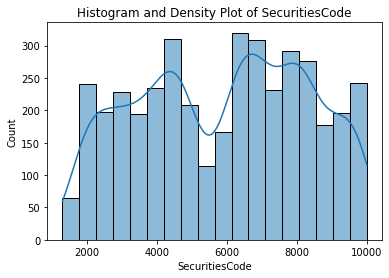

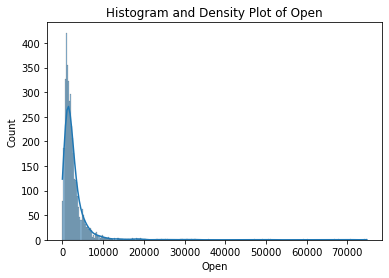

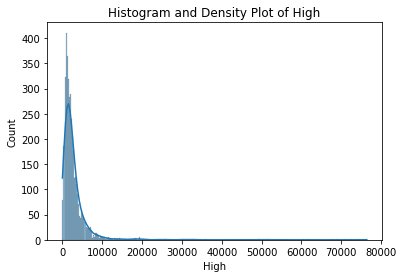

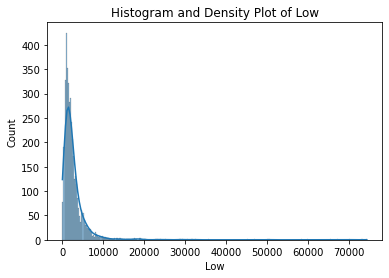

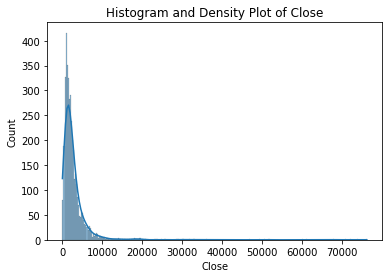

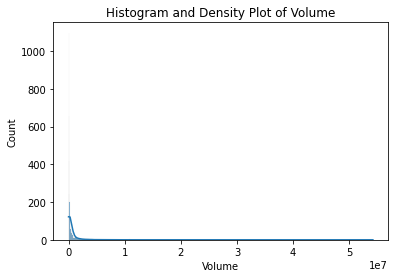

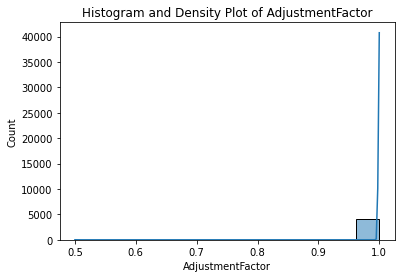

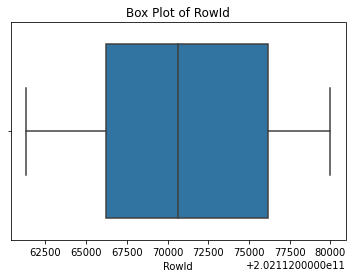

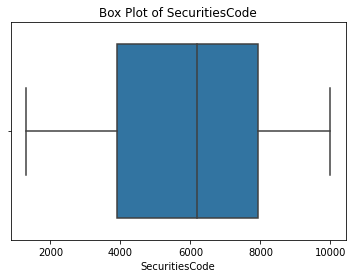

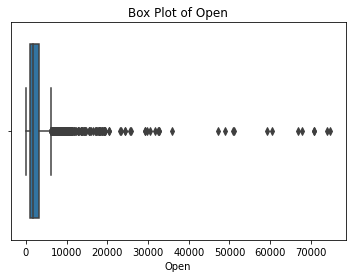

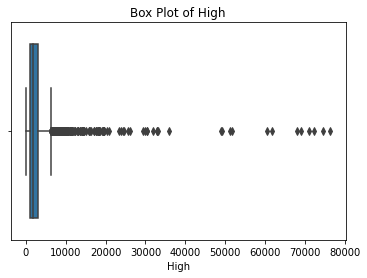

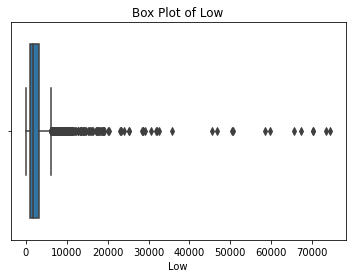

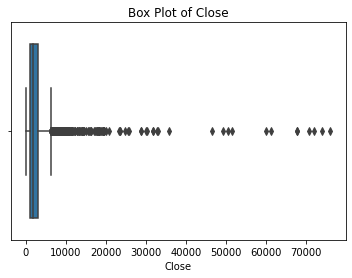

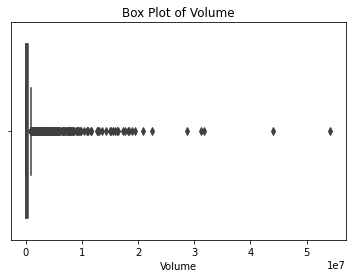

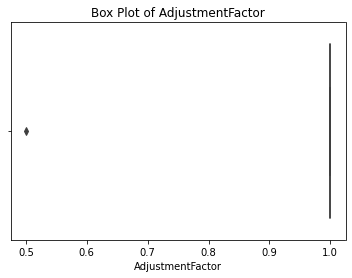

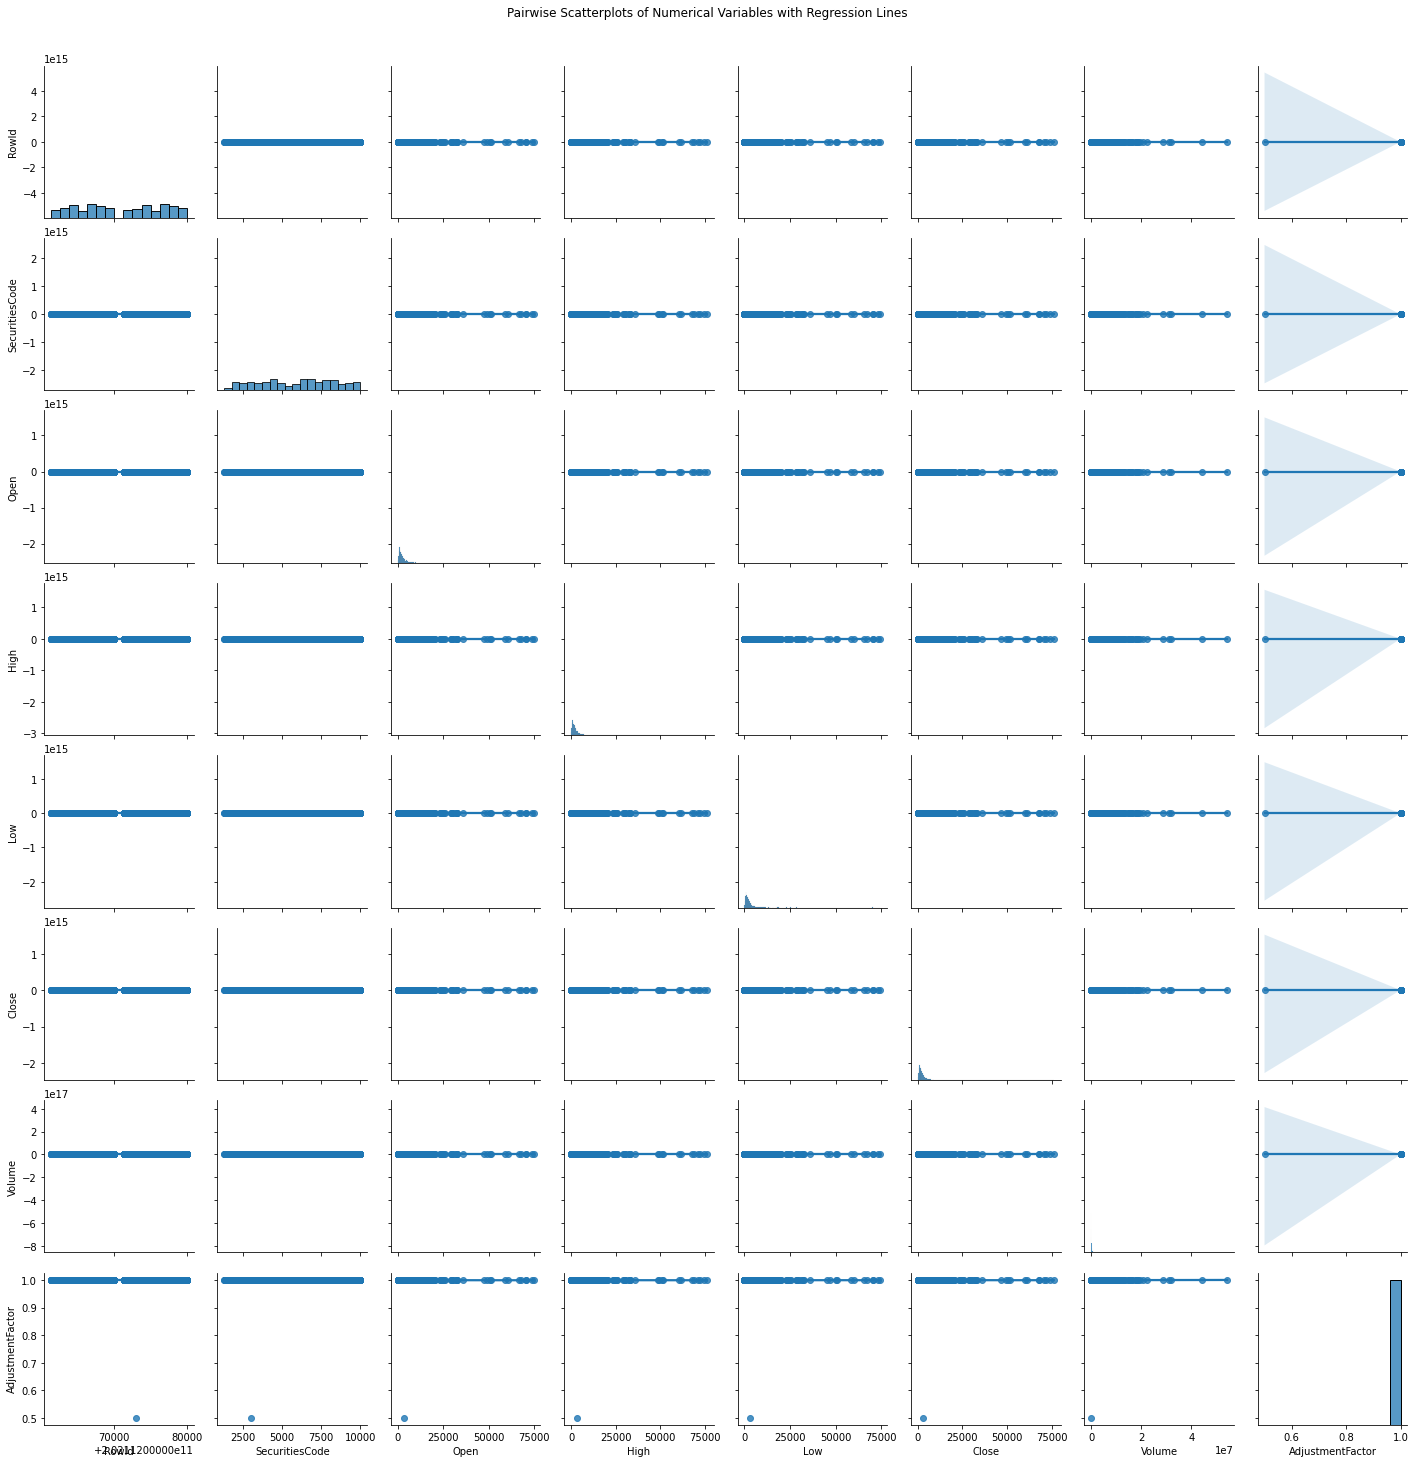

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and density plots for numerical variables
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.show()

# Box plots for numerical variables
for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Scatterplots for relationships between numerical variables
sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle('Pairwise Scatterplots of Numerical Variables with Regression Lines', y=1.02)
plt.show()

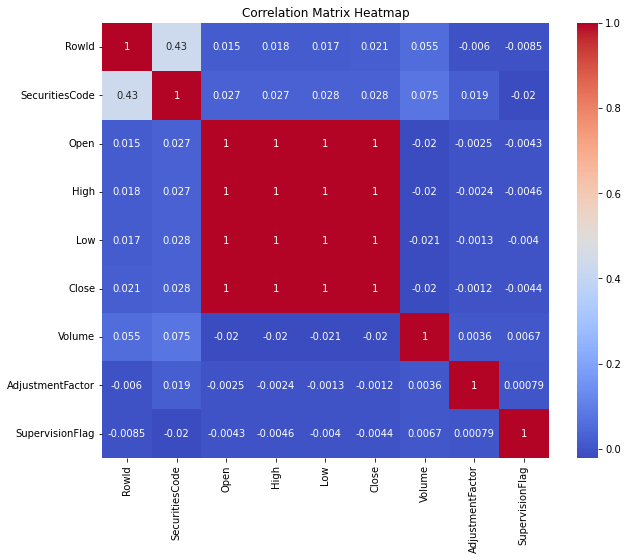

In [13]:
# Correlation matrix. Understanding how different numerical variables relate to each other can be insightful.
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# Missing Data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 RowId               0
Date                0
SecuritiesCode      0
Open                0
High                0
Low                 0
Close               0
Volume              0
AdjustmentFactor    0
SupervisionFlag     0
dtype: int64


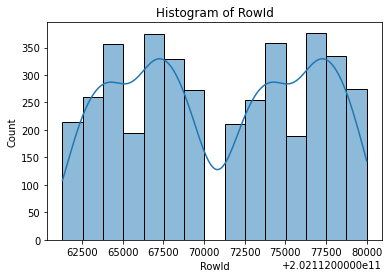

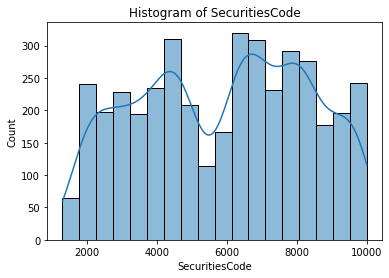

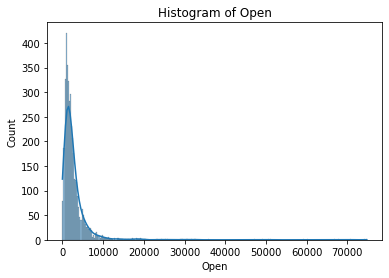

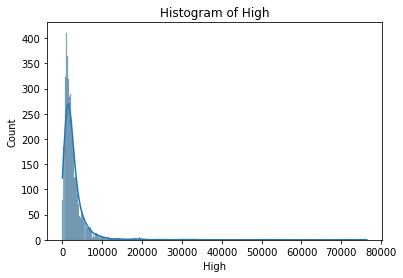

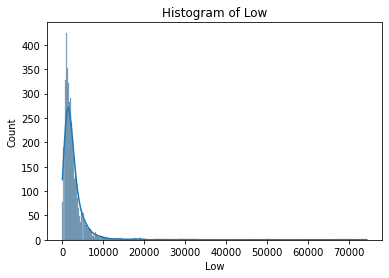

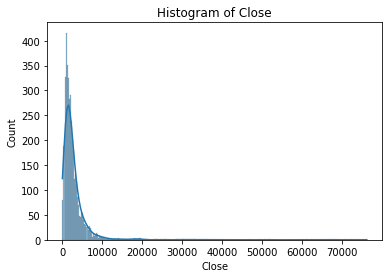

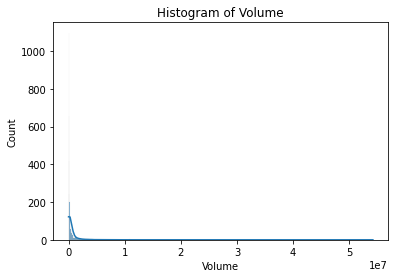

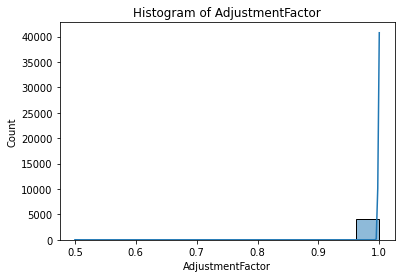

In [17]:
########### Assess Distribution and Missingness


import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numeric columns
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

In [20]:
# Assuming df is your DataFrame

# List of numeric columns to analyze for outliers
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'AdjustmentFactor']

# Function to detect outliers using the IQR method
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Apply outlier detection for each numeric column
outliers_summary = pd.DataFrame(index=numeric_columns, columns=['Outliers', 'Non-Outliers'])

for column_name in numeric_columns:
    outliers = detect_outliers_iqr(df[column_name])
    outliers_summary.loc[column_name, 'Outliers'] = outliers.sum()
    outliers_summary.loc[column_name, 'Non-Outliers'] = (~outliers).sum()

# Display the summary of outliers
print(outliers_summary)


                 Outliers Non-Outliers
Open                  271         3729
High                  274         3726
Low                   267         3733
Close                 273         3727
Volume                539         3461
AdjustmentFactor        1         3999


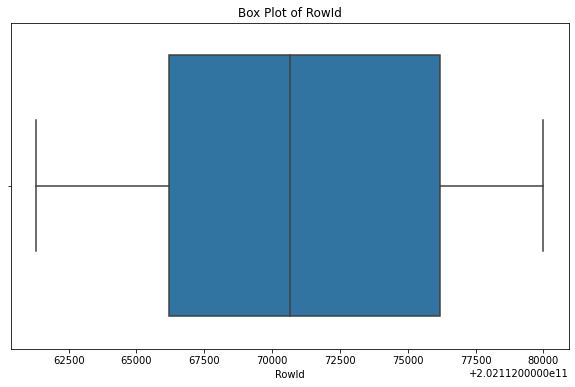

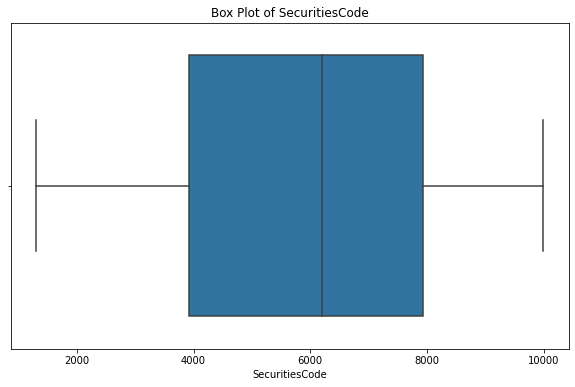

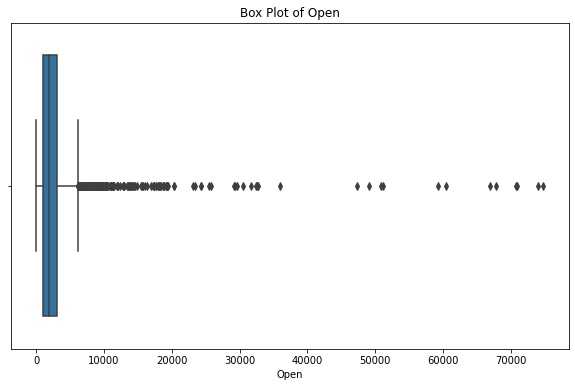

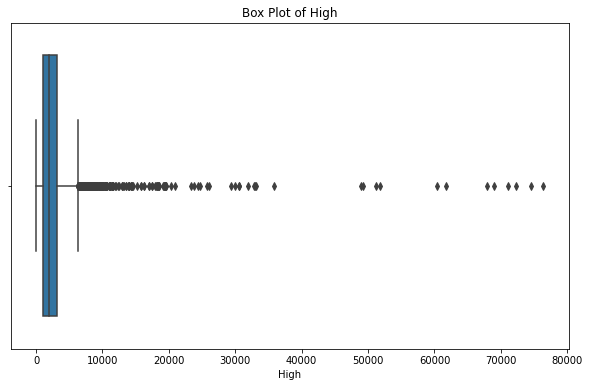

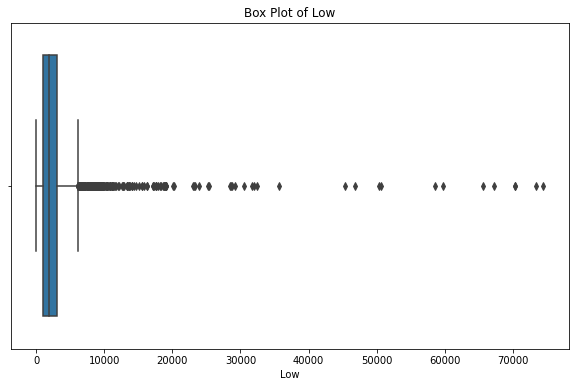

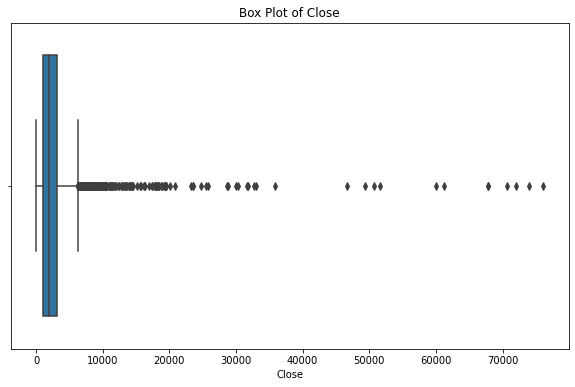

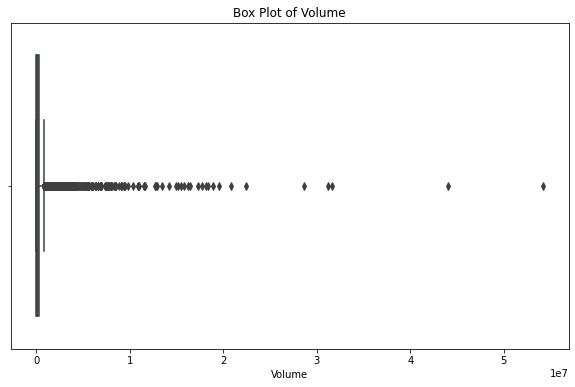

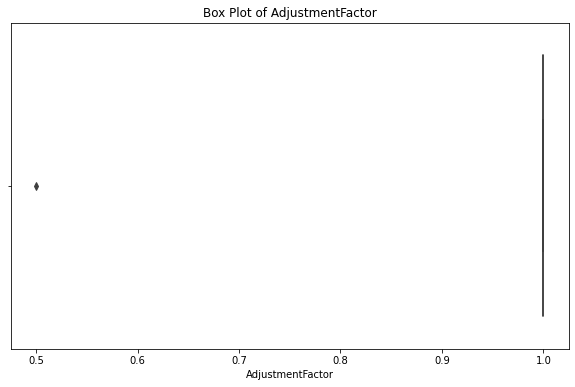

In [21]:
# Creating box plots for numerical variables
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
#Open Outliers: The analysis indicates 271 entries are identified as outliers in the 'Open' column. This suggests that these values fall significantly outside the typical range expected for opening stock prices. It could be due to unusually high or low opening prices compared to the rest of the dataset.
#High Outliers: Similarly, the 'High' column shows 274 entries identified as outliers. Similar to 'Open', this suggests that these high stock prices deviate significantly from the majority of the dataset.
#Low Outliers: The 'Low' column has 267 entries identified as outliers. These values are significantly different from the typical range expected for low stock prices, indicating potential extreme values.
#Close Outliers: In the 'Close' column, 273 entries are identified as outliers. This indicates that the closing stock prices for these entries are significantly different from the majority of the dataset.
#Volume Outliers: The 'Volume' column has 539 entries identified as outliers. This suggests that the trading volumes for these entries deviate significantly from the typical trading volumes observed in the dataset.
#AdjustmentFactor Outliers: Only 1 entry is identified as an outlier in the 'AdjustmentFactor' column. This suggests that the adjustment factor for this entry is significantly different from the majority of the dataset.

In [26]:
pip install scipy


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached scipy-1.12.0.tar.gz (56.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      + meson setup /private/var/folders/w4/72yt3m9d6b11hcq6rjl6wrhm0000gn/T/pip-install-ft2cpzkf/scipy_ab43fb7418524c25b0c353dd244273d3 /private/var/folders/w4/72yt3m9d6b11hcq6rjl6wrhm0000gn/T/pip-install-ft2cpzkf/scipy_ab43fb7418524c25b0c353dd244273d3/.mesonpy-nx2ratir -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=/private/var/folders/w4/

In [29]:
# For normalization
import pandas as pd



# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Apply Min-Max Scaling to numerical columns between 0 and 1
for column in numerical_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)

df.head()


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag
0,0.000000,2021-12-06,0.000000,0.039882,0.039037,0.039825,0.039030,0.000164,1.0,False
1,0.001658,2021-12-06,0.003565,0.007918,0.007841,0.007898,0.007738,0.025098,1.0,False
2,0.001712,2021-12-06,0.003680,0.031670,0.031261,0.031699,0.031227,0.002322,1.0,False
3,0.003958,2021-12-06,0.008510,0.016450,0.016219,0.016441,0.016080,0.001496,1.0,False
4,0.004012,2021-12-06,0.008625,0.017908,0.017960,0.017985,0.017748,0.000114,1.0,False


In [30]:
import pandas as pd



# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Apply Standardization to numerical columns
for column in numerical_columns:
    mean_val = df[column].mean()
    std_dev = df[column].std()
    df[column] = (df[column] - mean_val) / std_dev

df.head()


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag
0,-1.728845,2021-12-06,-1.917092,0.050143,0.040115,0.055205,0.044297,-0.277533,0.015811,False
1,-1.723252,2021-12-06,-1.904122,-0.496663,-0.497403,-0.496582,-0.498005,0.365277,0.015811,False
2,-1.723071,2021-12-06,-1.903704,-0.090333,-0.093870,-0.085237,-0.090937,-0.221901,0.015811,False
3,-1.715494,2021-12-06,-1.886131,-0.350696,-0.353042,-0.348944,-0.353437,-0.243203,0.015811,False
4,-1.715313,2021-12-06,-1.885713,-0.325758,-0.323042,-0.322248,-0.324523,-0.278816,0.015811,False
